In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_curve, RocCurveDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dataset = pd.read_csv('/content/drive/MyDrive/AI_Project/train.csv')
test_dataset= pd.read_csv('/content/drive/MyDrive/AI_Project/test.csv')

In [ ]:
train_dataset

,Id,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,914,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
731,915,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
732,916,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
733,917,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
train_dataset.columns

Index(['Id', 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

In [ ]:
test_dataset

,Id,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,401,50,F,ASY,160,0,1,Normal,110,N,0.0,Flat
1,402,51,M,ASY,130,0,1,ST,163,N,0.0,Flat
2,403,65,M,ASY,145,0,1,ST,67,N,0.7,Flat
3,404,52,M,ASY,135,0,1,Normal,128,Y,2.0,Flat
4,405,47,M,NAP,110,0,1,Normal,120,Y,0.0,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...
178,579,57,M,ASY,156,173,0,LVH,119,Y,3.0,Down
179,580,69,M,ASY,145,289,1,ST,110,Y,1.8,Flat
180,581,51,M,ASY,131,152,1,LVH,130,Y,1.0,Flat
181,582,48,M,ASY,140,208,0,Normal,159,Y,1.5,Up


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              735 non-null    int64  
 1   Age             735 non-null    int64  
 2   Sex             735 non-null    object 
 3   ChestPainType   735 non-null    object 
 4   RestingBP       735 non-null    int64  
 5   Cholesterol     735 non-null    int64  
 6   FastingBS       735 non-null    int64  
 7   RestingECG      735 non-null    object 
 8   MaxHR           735 non-null    int64  
 9   ExerciseAngina  735 non-null    object 
 10  Oldpeak         735 non-null    float64
 11  ST_Slope        735 non-null    object 
 12  HeartDisease    735 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 74.8+ KB


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_dataset['Sex']= label_encoder.fit_transform(train_dataset['Sex'])
train_dataset['ChestPainType']= label_encoder.fit_transform(train_dataset['ChestPainType'])
train_dataset['RestingECG']= label_encoder.fit_transform(train_dataset['RestingECG'])
train_dataset['ExerciseAngina']= label_encoder.fit_transform(train_dataset['ExerciseAngina'])
train_dataset['ST_Slope']= label_encoder.fit_transform(train_dataset['ST_Slope'])

test_dataset['Sex']= label_encoder.fit_transform(test_dataset['Sex'])
test_dataset['ChestPainType']= label_encoder.fit_transform(test_dataset['ChestPainType'])
test_dataset['RestingECG']= label_encoder.fit_transform(test_dataset['RestingECG'])
test_dataset['ExerciseAngina']= label_encoder.fit_transform(test_dataset['ExerciseAngina'])
test_dataset['ST_Slope']= label_encoder.fit_transform(test_dataset['ST_Slope'])

In [ ]:
train_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              735 non-null    int64  
 1   Age             735 non-null    int64  
 2   Sex             735 non-null    int64  
 3   ChestPainType   735 non-null    int64  
 4   RestingBP       735 non-null    int64  
 5   Cholesterol     735 non-null    int64  
 6   FastingBS       735 non-null    int64  
 7   RestingECG      735 non-null    int64  
 8   MaxHR           735 non-null    int64  
 9   ExerciseAngina  735 non-null    int64  
 10  Oldpeak         735 non-null    float64
 11  ST_Slope        735 non-null    int64  
 12  HeartDisease    735 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 74.8 KB


In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              183 non-null    int64  
 1   Age             183 non-null    int64  
 2   Sex             183 non-null    int64  
 3   ChestPainType   183 non-null    int64  
 4   RestingBP       183 non-null    int64  
 5   Cholesterol     183 non-null    int64  
 6   FastingBS       183 non-null    int64  
 7   RestingECG      183 non-null    int64  
 8   MaxHR           183 non-null    int64  
 9   ExerciseAngina  183 non-null    int64  
 10  Oldpeak         183 non-null    float64
 11  ST_Slope        183 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 17.3 KB


In [ ]:
train_dataset.describe()

,Id,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,451.408163,52.144218,0.745578,0.817687,131.922449,211.112925,0.189116,0.897959,140.391837,0.341497,0.796735,1.428571,0.497959
std,294.629952,9.272349,0.435832,0.952245,18.470117,103.100871,0.391867,0.594419,25.266351,0.474535,1.050958,0.588259,0.500336
min,1.000000,28.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,184.500000,45.000000,0.000000,0.000000,120.000000,187.000000,0.000000,1.000000,122.000000,0.000000,0.000000,1.000000,0.000000
50%,368.000000,53.000000,1.000000,0.000000,130.000000,230.000000,0.000000,1.000000,142.000000,0.000000,0.200000,1.000000,0.000000
75%,734.500000,59.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000
max,918.000000,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_18, *['Id'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_19, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_20, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_21, *['ChestPainType'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_22, *['Id'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_23, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_24, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_25, *['ChestPainType'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_26, *[[['Id', 'Age'], ['Age', 'Sex'], ['Sex', 'ChestPainType'], ['ChestPainType', 'RestingBP']]], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
train_dataset.corr()

,Id,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Id,1.000000,0.306506,-0.049078,0.081157,0.016786,0.120923,0.032560,-0.474658,0.203832,0.015782,0.195120,-0.115988,0.047204
Age,0.306506,1.000000,-0.007427,-0.064293,0.259473,-0.069924,0.172460,-0.129076,-0.342012,0.163115,0.221447,-0.221905,0.245274
Sex,-0.049078,-0.007427,1.000000,-0.134896,0.003300,-0.188735,0.098634,-0.000429,-0.155483,0.157175,0.066892,-0.116147,0.294383
ChestPainType,0.081157,-0.064293,-0.134896,1.000000,0.012906,0.091909,-0.079076,-0.076236,0.306430,-0.389657,-0.182744,0.219934,-0.426850
RestingBP,0.016786,0.259473,0.003300,0.012906,1.000000,0.104501,0.034970,-0.003079,-0.111975,0.148674,0.171956,-0.062015,0.108414
Cholesterol,0.120923,-0.069924,-0.188735,0.091909,0.104501,1.000000,-0.271884,-0.204043,0.214863,-0.017692,0.074210,0.087931,-0.227061
FastingBS,0.032560,0.172460,0.098634,-0.079076,0.034970,-0.271884,1.000000,0.012772,-0.087578,0.040530,0.059393,-0.133400,0.255598
RestingECG,-0.474658,-0.129076,-0.000429,-0.076236,-0.003079,-0.204043,0.012772,1.000000,-0.176038,0.022277,-0.096928,0.059000,-0.002992
MaxHR,0.203832,-0.342012,-0.155483,0.306430,-0.111975,0.214863,-0.087578,-0.176038,1.000000,-0.360816,-0.166361,0.324263,-0.394376
ExerciseAngina,0.015782,0.163115,0.157175,-0.389657,0.148674,-0.017692,0.040530,0.022277,-0.360816,1.000000,0.381688,-0.402993,0.464863


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_27, *['Id'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_28, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_29, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_30, *['ChestPainType'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_31, *['Id'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_32, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_33, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_34, *['ChestPainType'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_35, *[[['Id', 'Age'], ['Age', 'Sex'], ['Sex', 'ChestPainType'], ['ChestPainType', 'RestingBP']]], **{})
chart

<Axes: title={'center': 'Affected(1) vs Healthy(0)'}, xlabel='Output class', ylabel='Count'>

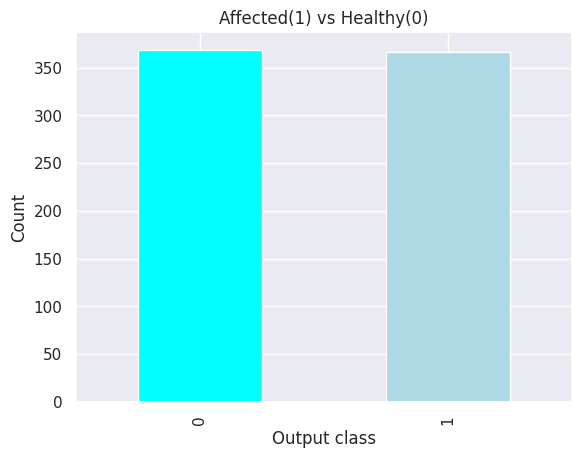

In [ ]:
train_dataset.HeartDisease.value_counts().plot.bar(color=['cyan', 'lightblue'],title="Affected(1) vs Healthy(0)", xlabel="Output class", ylabel = "Count")

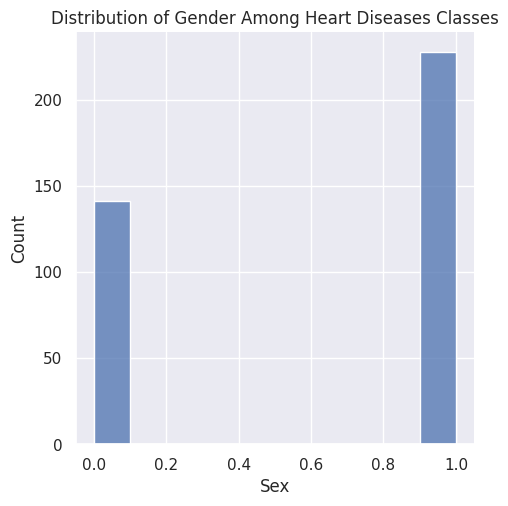

In [ ]:
temp = train_dataset.query('HeartDisease == 0')
sns.set_theme()
sns.displot(data=temp.Sex).set(title="Distribution of Gender Among Heart Diseases Classes", xlabel="Sex")

In [ ]:
train_dataset

,Id,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,40,1,1,140,289,0,1,172,0,0.0,2,0
1,2,49,0,2,160,180,0,1,156,0,1.0,1,1
2,3,37,1,1,130,283,0,2,98,0,0.0,2,0
3,4,48,0,0,138,214,0,1,108,1,1.5,1,1
4,5,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,914,45,1,3,110,264,0,1,132,0,1.2,1,1
731,915,68,1,0,144,193,1,1,141,0,3.4,1,1
732,916,57,1,0,130,131,0,1,115,1,1.2,1,1
733,917,57,0,1,130,236,0,0,174,0,0.0,1,1


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              735 non-null    int64  
 1   Age             735 non-null    int64  
 2   Sex             735 non-null    int64  
 3   ChestPainType   735 non-null    int64  
 4   RestingBP       735 non-null    int64  
 5   Cholesterol     735 non-null    int64  
 6   FastingBS       735 non-null    int64  
 7   RestingECG      735 non-null    int64  
 8   MaxHR           735 non-null    int64  
 9   ExerciseAngina  735 non-null    int64  
 10  Oldpeak         735 non-null    float64
 11  ST_Slope        735 non-null    int64  
 12  HeartDisease    735 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 74.8 KB


In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              183 non-null    int64  
 1   Age             183 non-null    int64  
 2   Sex             183 non-null    int64  
 3   ChestPainType   183 non-null    int64  
 4   RestingBP       183 non-null    int64  
 5   Cholesterol     183 non-null    int64  
 6   FastingBS       183 non-null    int64  
 7   RestingECG      183 non-null    int64  
 8   MaxHR           183 non-null    int64  
 9   ExerciseAngina  183 non-null    int64  
 10  Oldpeak         183 non-null    float64
 11  ST_Slope        183 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 17.3 KB


In [ ]:
X_train = train_dataset.iloc[:, 1:12].values
y_train = train_dataset.iloc[:, 12].values

In [ ]:
label_dataset = pd.read_csv('/content/drive/MyDrive/AI_Project/Label.csv')

In [ ]:
X_test = test_dataset.iloc[:, 1:].values
y_test = label_dataset.iloc[:, 1].values

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(735, 11)
(735,)
(183, 11)
(183,)


LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score:  0.8852459016393442
F1 score:  0.9288135593220339
Precision score:  0.8954248366013072
Recall score:  0.9647887323943662


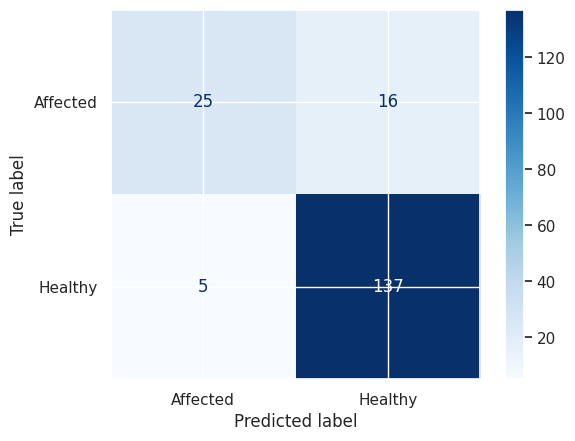

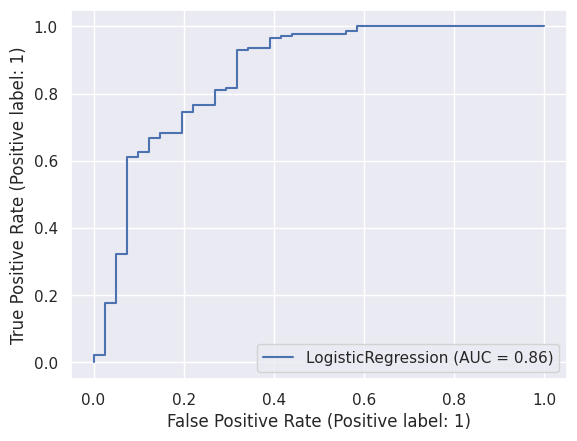

In [ ]:
clf = LogisticRegression(random_state = 0,C=2,penalty= 'l2').fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.predict_proba(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Healthy'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

SVM


Accuracy score:  0.8907103825136612
F1 score:  0.9324324324324325
Precision score:  0.8961038961038961
Recall score:  0.971830985915493


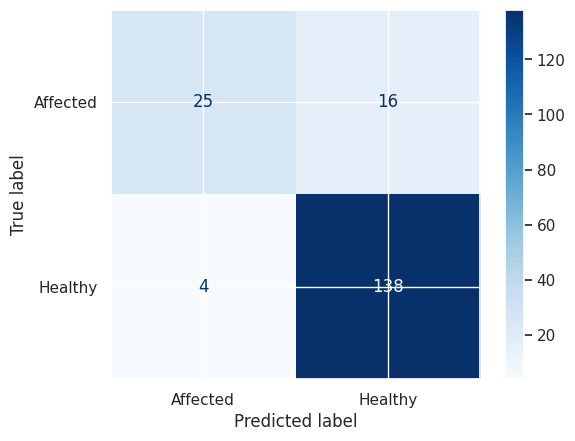

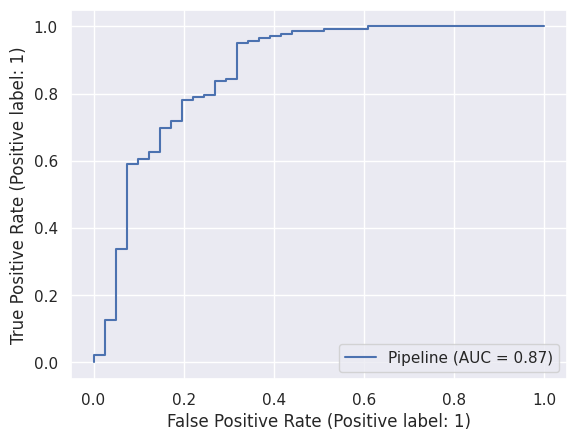

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear',C = 0.1))
clf.fit(X_train, y_train)
Y_pred= clf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Healthy'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

GaussianNB

Accuracy score:  0.8743169398907104
F1 score:  0.9245901639344262
Precision score:  0.8650306748466258
Recall score:  0.9929577464788732


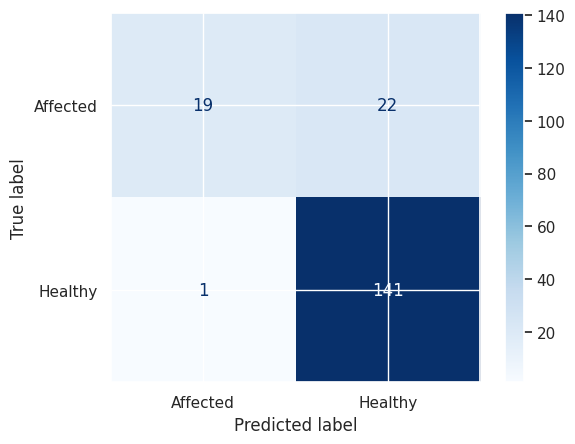

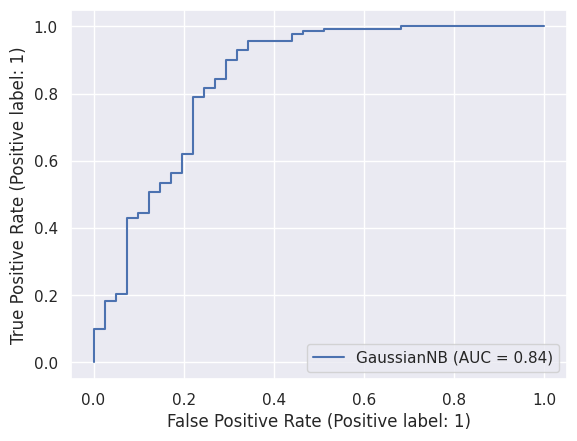

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Healthy'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

KNeighborsClassifier

Accuracy score:  0.7923497267759563
F1 score:  0.8698630136986302
Precision score:  0.8466666666666667
Recall score:  0.8943661971830986


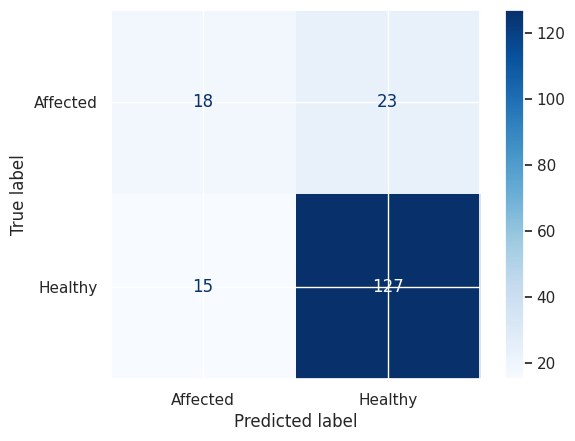

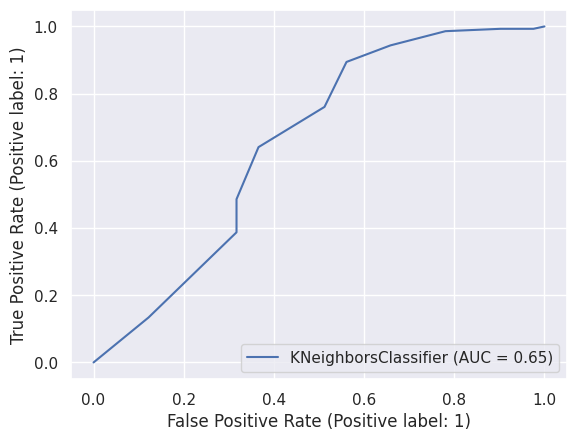

In [ ]:
neigh = KNeighborsClassifier(leaf_size = 1, n_neighbors = 11,p = 1)
neigh.fit(X_train, y_train)
Y_pred = neigh.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Healthy'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(neigh, X_test, y_test)

RandomForestClassifier

Accuracy score:  0.8961748633879781
F1 score:  0.9355932203389831
Precision score:  0.9019607843137255
Recall score:  0.971830985915493


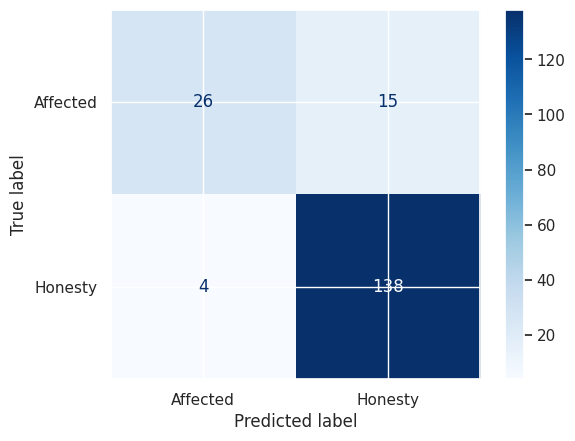

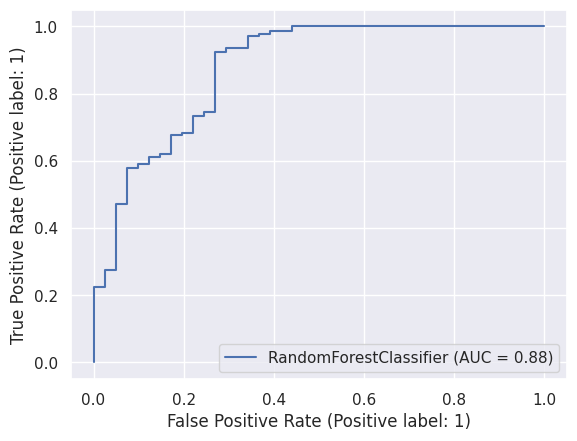

In [ ]:
rf = RandomForestClassifier(max_depth = 4,random_state = 0)
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Honesty'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)

DecisionTreeClassifier

Accuracy score:  0.8306010928961749
F1 score:  0.8904593639575973
Precision score:  0.8936170212765957
Recall score:  0.8873239436619719


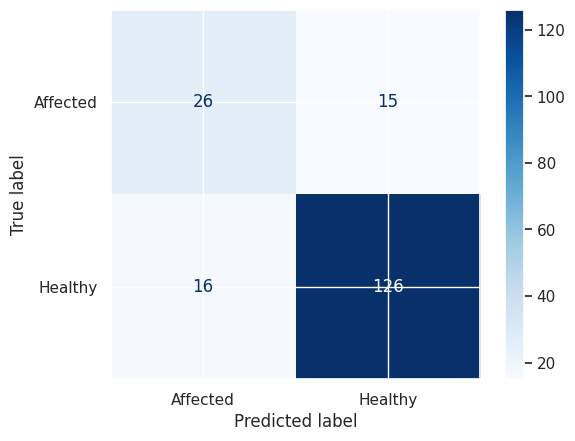

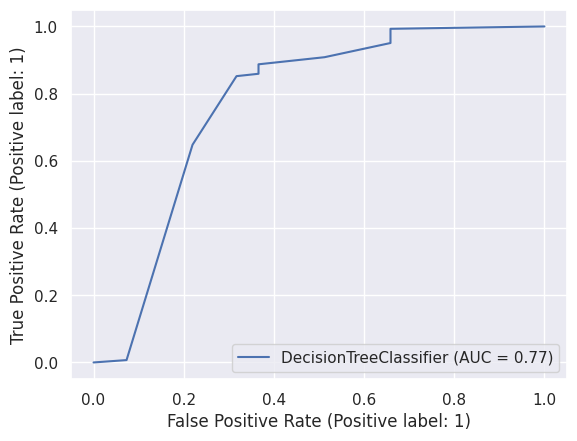

In [ ]:
dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
dt.fit(X_train, y_train)
Y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Affected','Healthy'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(dt, X_test, y_test)